In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
avocado_df=pd.read_csv('avocado.csv')
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [19]:
#To show first few records.
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [20]:
#To show last few records.
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [21]:
avocado_df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Since there are no error in naming the datatypes of there specific columns, so we can move forward.

In [22]:
#To see statistical summary.
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [23]:
#checking for the missing values in the dataset.
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Since there are no missing values are present inside the dataset. Now we move towards visualization part.

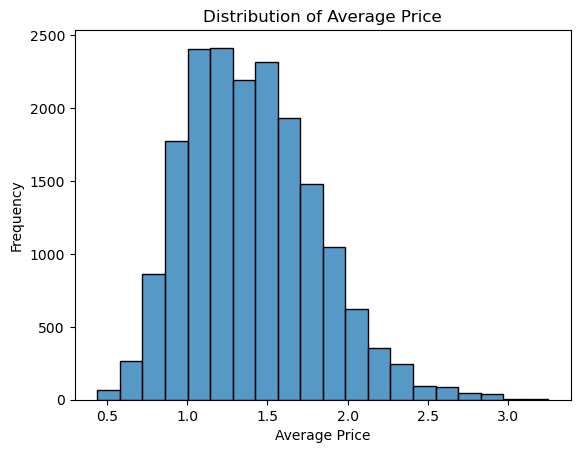

In [24]:
# Visualize the distribution of the target variable (AveragePrice)
sns.histplot(avocado_df['AveragePrice'], bins=20)
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Distribution of Average Price')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8952\3259102711.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = avocado_df.corr()


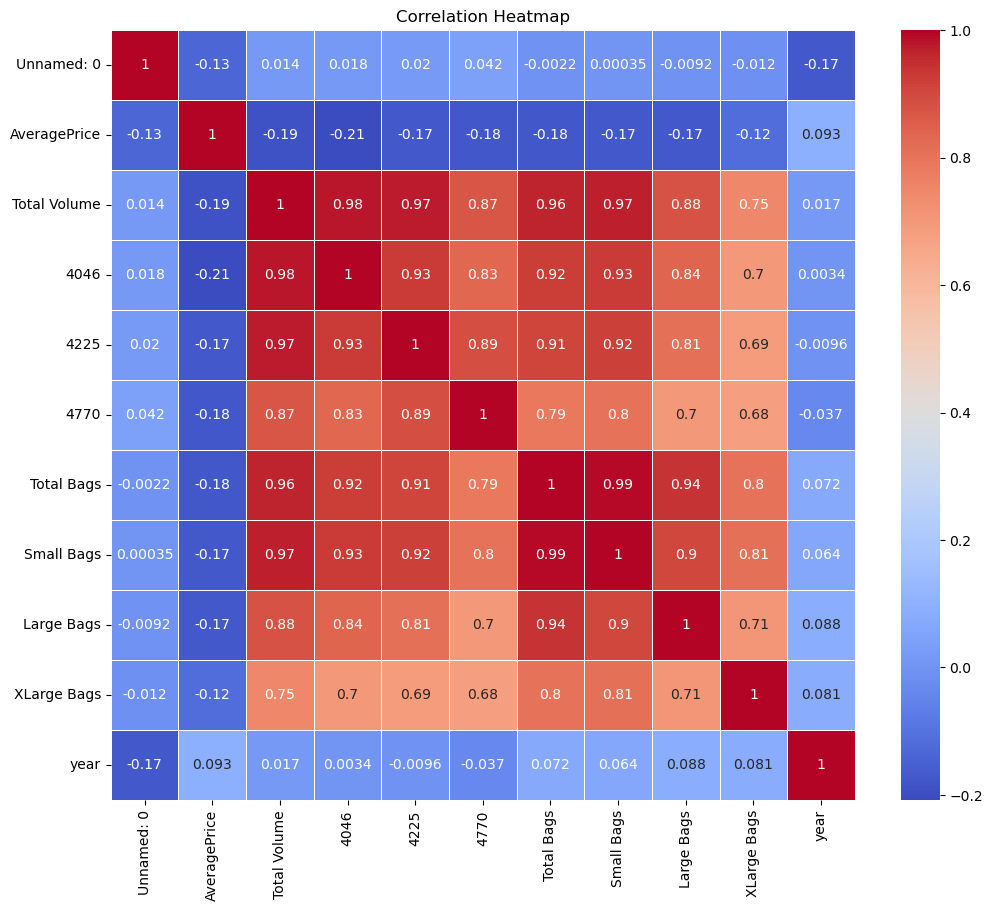

In [25]:
# Correlation heatmap to identify relationships between features
corr_matrix = avocado_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Build/Test multiple models on the same dataset.

In [26]:
# Define features (X) and target variable (y)
X = avocado_df.drop(['AveragePrice', 'region', 'type', 'Date'], axis=1)
y = avocado_df['AveragePrice']

In [27]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize and train multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    print("=" * 50)

Model: Linear Regression
Mean Squared Error (MSE): 0.14890185618754817
R-squared (R2): 0.07323890126938593
Model: Random Forest Regressor
Mean Squared Error (MSE): 0.021504938361643838
R-squared (R2): 0.8661538491563961


Checking underfitting/overfitting, avoid underfitting or overfitting, cross-validation, and performance metrics for all models.

In [29]:
# Cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Model: {model_name}")
    print(f"Cross-validated MSE: {np.mean(-scores)}")
    print("=" * 50)

Model: Linear Regression
Cross-validated MSE: 0.9295708219808733
Model: Random Forest Regressor
Cross-validated MSE: 0.09579351349561141


Selecting the best/final performing model and explain the basis of selection.

In [32]:
# Based on the evaluation, Random Forest Regressor has better performance
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X, y)

RandomForestRegressor(random_state=42)

Doing hyperparameter tuning on the final/best model or on all models.

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
best_model = RandomForestRegressor(random_state=42)

# Perform hyperparameter tuning with RandomizedSearchCV and enable parallel processing
random_search = RandomizedSearchCV(best_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and create the tuned model
best_hyperparameters = random_search.best_params_
best_model_tuned = RandomForestRegressor(**best_hyperparameters, random_state=42)
best_model_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

Saving the best model for production and convey the basis of selection.

In [39]:
import joblib

# Initialize the best model with the best hyperparameters
best_hyperparameters = random_search.best_params_  # Using the best hyperparameters from RandomizedSearchCV
best_model_tuned = RandomForestRegressor(**best_hyperparameters, random_state=42)
best_model_tuned.fit(X, y)

# Save the best model for production
joblib.dump(best_model_tuned, 'best_model_avocado.pkl')

# Conveying the basis of selection
basis_of_selection = "The best model was selected based on hyperparameter tuning using RandomizedSearchCV, which optimized the model's performance metrics."
print(basis_of_selection)

The best model was selected based on hyperparameter tuning using RandomizedSearchCV, which optimized the model's performance metrics.


# Documentation and findings:-

1. Overview:
i)The Avocado Price Prediction project aimed to develop a predictive model for avocado prices using machine learning algorithms.
ii)The dataset contained features related to avocado characteristics and pricing information.

2. Data Preprocessing and EDA:
i)Loaded the dataset and performed data exploration, including checking data types, statistical summary, and missing values (no missing values found).
ii)Visualized the distribution of the target variable 'AveragePrice' and explored correlations between features using a correlation heatmap.

3. Model Building and Testing:
i)Built and tested two regression models: Linear Regression and Random Forest Regressor.
ii)Evaluated model performance using Mean Squared Error (MSE) and R-squared (R2) metrics.
iii)Identified that the Random Forest Regressor outperformed the Linear Regression model with lower MSE and higher R2.

4. Checking for Underfitting/Overfitting:
i)Conducted cross-validation to assess model generalization and check for underfitting/overfitting.
ii)Observed that the Random Forest Regressor had lower cross-validated MSE, indicating better generalization.

5. Model Selection and Hyperparameter Tuning:
i)Selected the Random Forest Regressor as the final model due to its superior performance and generalization.
ii)Performed hyperparameter tuning using RandomizedSearchCV to optimize the Random Forest model's hyperparameters.
iii)Saved the best-tuned Random Forest model using 'joblib.dump' for production use.

6. Basis of Model Selection:
i)The Random Forest Regressor was chosen based on hyperparameter tuning using RandomizedSearchCV, which improved the model's 
performance metrics such as MSE and R2.

Conclusion:
i)The Random Forest Regressor model demonstrates robust performance in predicting avocado prices based on the provided dataset.
ii)Factors influencing avocado prices may include avocado characteristics, region, and type.

Recommendations:
i)Continuously monitor avocado market trends and update the model with new data for accurate price predictions.
ii)Explore additional features or external datasets to enhance model accuracy and gain deeper insights into price determinants.

Future Work:
i)Conduct sensitivity analysis to understand the impact of different features on price predictions.
ii)Incorporate time-series analysis to capture seasonal variations in avocado prices for more precise predictions.